# Avacado Project

### Problem Statement:
Avocado is a fruit consumed by people heavily in the United States.

### Content  
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

### Some relevant columns in the dataset:

Date - The date of the observation  
AveragePrice - the average price of a single avocado  
type - conventional or organic  
year - the year  
Region - the city or region of the observation  
Total Volume - Total number of avocados sold  
4046 - Total number of avocados with PLU 4046 sold  
4225 - Total number of avocados with PLU 4225 sold  
4770 - Total number of avocados with PLU 4770 sold  

### Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file.   
To download the dataset, use the link given below.   
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

In [1]:
# Import required Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Data from CSV
df = pd.read_csv(r"E:\Flip Robo\Data\avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.shape

(18249, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
# summary of statstics
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


- So, here all values 18249 are perfect and dont have any mising values

In [7]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

- Its good , there are no null values in data set

In [8]:
# Exploring the data variable
df.AveragePrice.unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [9]:
df.AveragePrice.value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

In [10]:
# mean AveragePrice with two decimals only
ap = df['AveragePrice'].mean()
print("Mean Value of Average Price", round(ap,2))

Mean Value of Average Price 1.41


In [11]:
# Standard deviation of Average Price
s = df['AveragePrice'].std()
print('Standard Deviation of Average Price', round(s,2))

Standard Deviation of Average Price 0.4


In [12]:
# What are the unique type values? 
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [13]:
# No. of rows of each type 
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [14]:
# Display the descriptive statistics grouped by 'type'  
df.groupby('type').describe()

AveragePrice                                                    \
                    count      mean       std   min   25%   50%   75%   max   
type                                                                          
conventional       9126.0  1.158040  0.263041  0.46  0.98  1.13  1.32  2.22   
organic            9123.0  1.653999  0.363502  0.44  1.42  1.63  1.87  3.25   

             Total Volume                ... XLarge Bags               year  \
                    count          mean  ...         75%        max   count   
type                                     ...                                  
conventional       9126.0  1.653213e+06  ...    2409.215  551693.65  9126.0   
organic            9123.0  4.781121e+04  ...       0.000     510.41  9123.0   

                                                                             
                     mean       std     min     25%     50%     75%     max  
type                                                                         
conventional  2016.147929  0.939968  2015.0  2015.0  2016.0  2017.0  2018.0  
organic       2016.147868  0.939961  2015.0  2015.0  2016.0  2017.0  2018.0  

[2 rows x 80 columns]

In [15]:
# Display the descriptive statistics for 'AveragePrice' grouped by 'type' 
df_by_type = df.groupby('type')
df_by_type['AveragePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
conventional,9126.0,1.158040,0.263041,0.46,0.98,1.13,1.32,2.22
organic,9123.0,1.653999,0.363502,0.44,1.42,1.63,1.87,3.25


In [16]:
# Compare the mean of AveragePrice between different types? 
df['AveragePrice'].groupby(df['type']).mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

In [17]:
# We have split column 'Date' into three new column namely Year,month,day
df['Year'],df['month'],df['day']=df['Date'].str.split('-').str

In [18]:
df.drop('year', axis = 1, inplace = True)

In [19]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,month,day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,06
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29


In [20]:
df.shape

(18249, 15)

# Visualization of Data

Text(0.5, 1.0, 'AveragePrice')

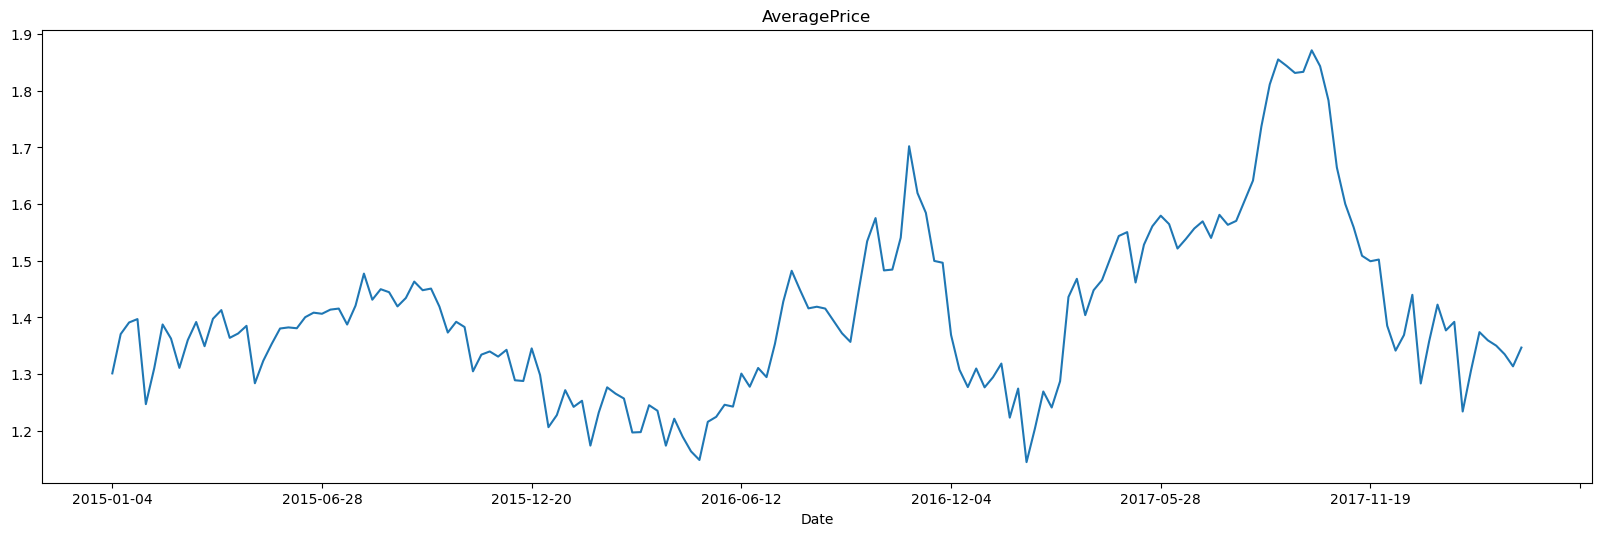

In [21]:
# Average price of Avacado at various point of Time
By_Date=df.groupby('Date').mean()
plt.figure(figsize=(20,6),dpi=100)
By_Date['AveragePrice'].plot()
plt.title('AveragePrice')

Text(0.5, 1.0, 'Average Price Per Month')

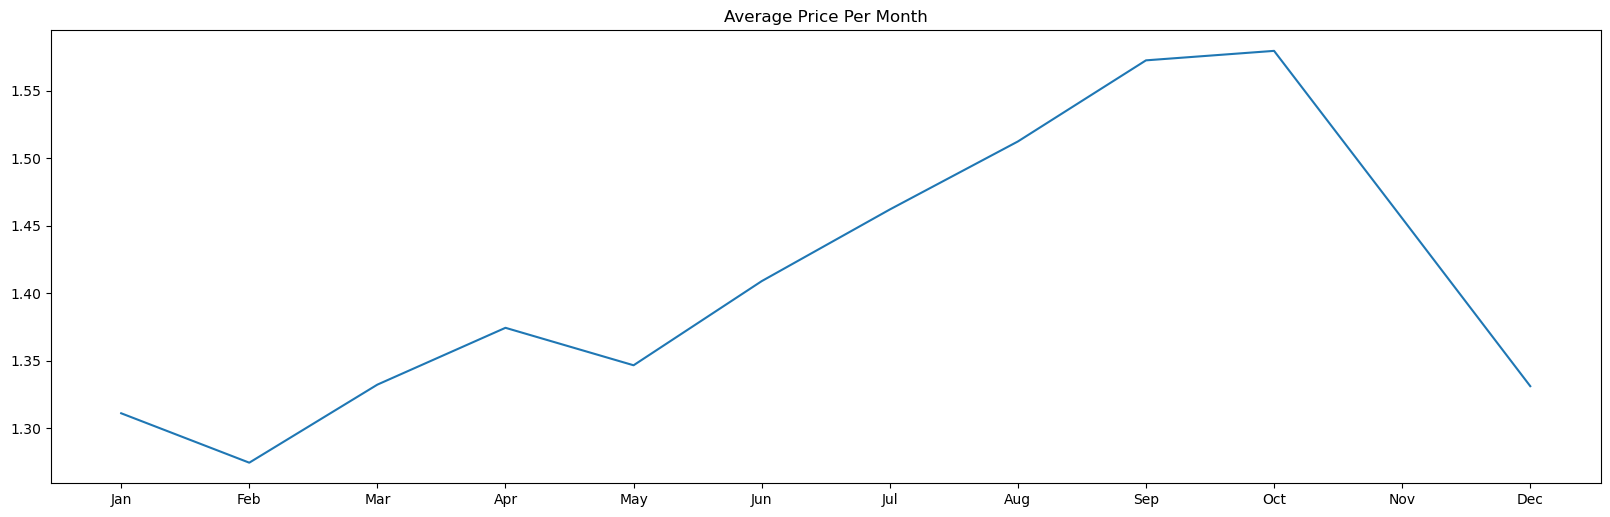

In [22]:
# Mont wise average price of Avacado 
By_Month = df.groupby('month').mean()
plt.figure(figsize=(20,6),dpi=100)
plt.plot(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],By_Month['AveragePrice'])
plt.title('Average Price Per Month')

Text(0.5, 1.0, 'Average Price per day')

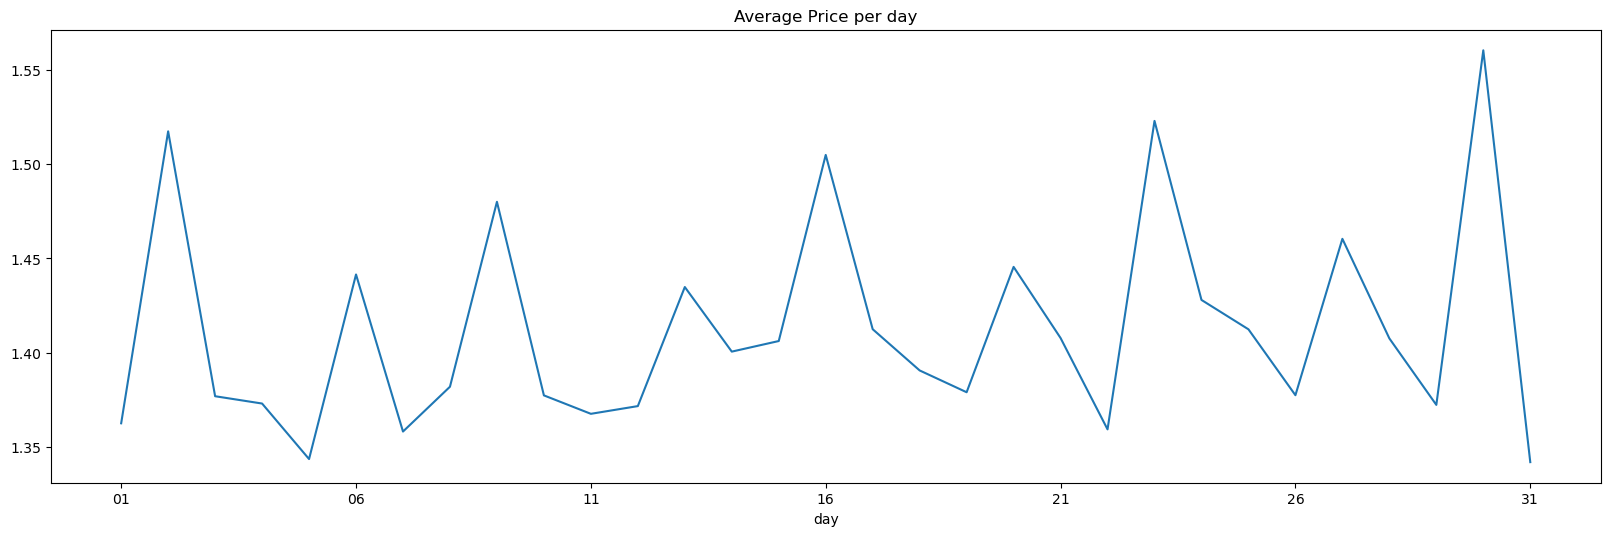

In [23]:
# Day wise average price of Avacado
By_day = df.groupby('day').mean()
plt.figure(figsize=(20,6), dpi = 100)
By_day['AveragePrice'].plot()
plt.title('Average Price per day')

Text(0.5, 1.0, 'Type Wise Average Price')

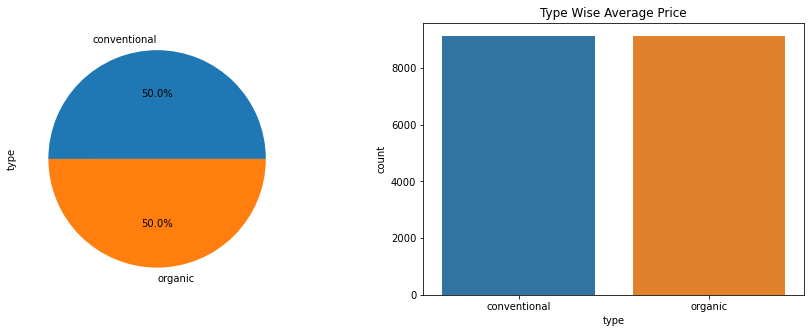

In [24]:
# Type wise average price of Avacado
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['type'])
df['type'].value_counts()
plt.title('Type Wise Average Price')

Text(0.5, 1.0, 'Year Wise Average Price')

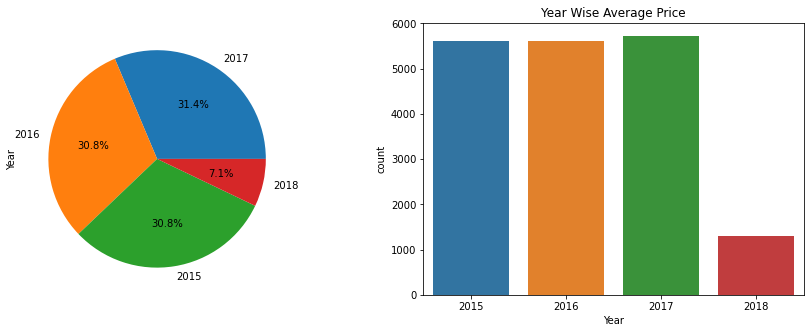

In [25]:
# Year wise average price of Avacado
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Year'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Year'])
df['Year'].value_counts()
plt.title('Year Wise Average Price')

- Most of the data is from 2017 followed by 2016 and 2015 respectively, while 2018 has the least data.

In [26]:
print(df['region'].value_counts())

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

Text(0.5, 1.0, 'Average Price According to Region')

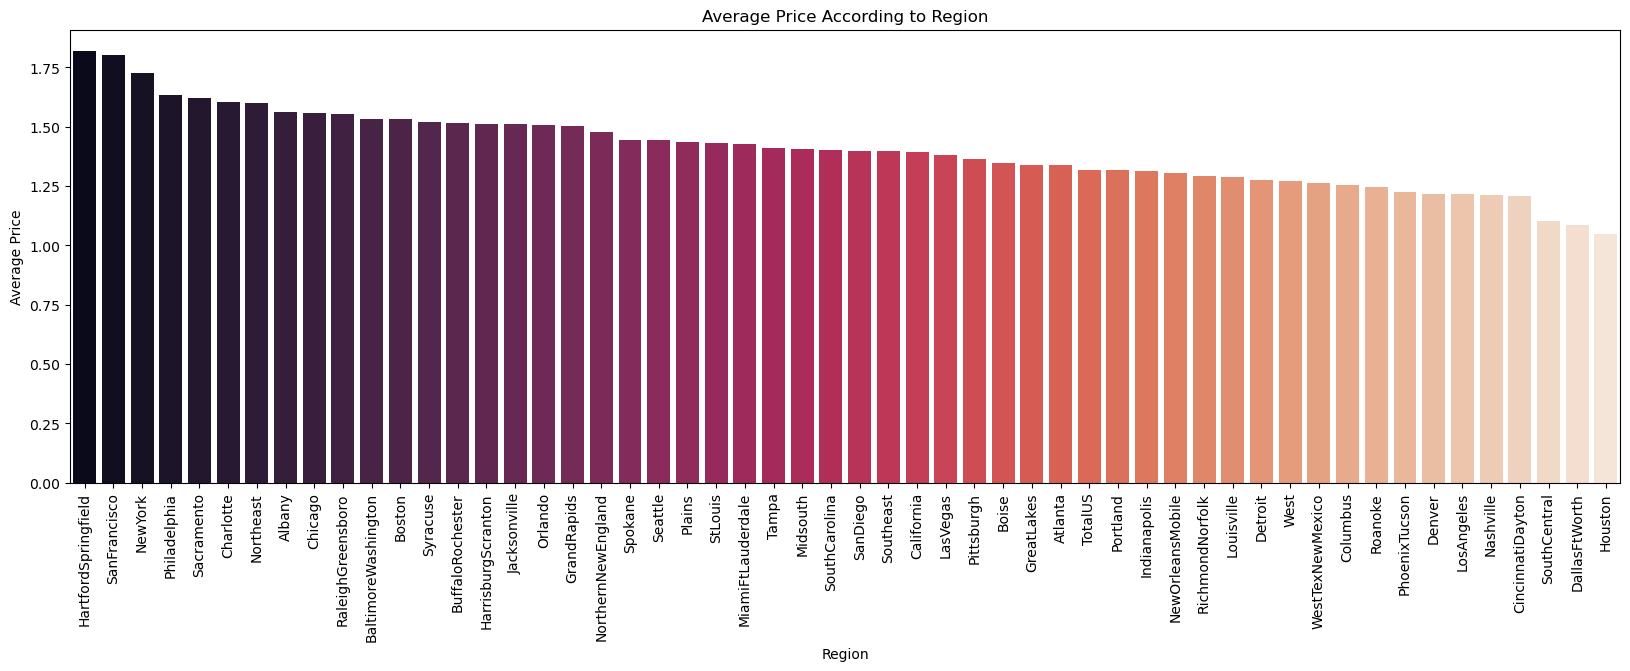

In [27]:
# Average price distribution based on region
byRegion = df.groupby('region').mean()
byRegion.sort_values(by=['AveragePrice'],ascending=False,inplace=True)
plt.figure(figsize=(20,6),dpi=100)
sns.barplot(x=byRegion.index,y=byRegion["AveragePrice"],data=byRegion,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

Text(0, 0.5, 'Average of Total Volume')

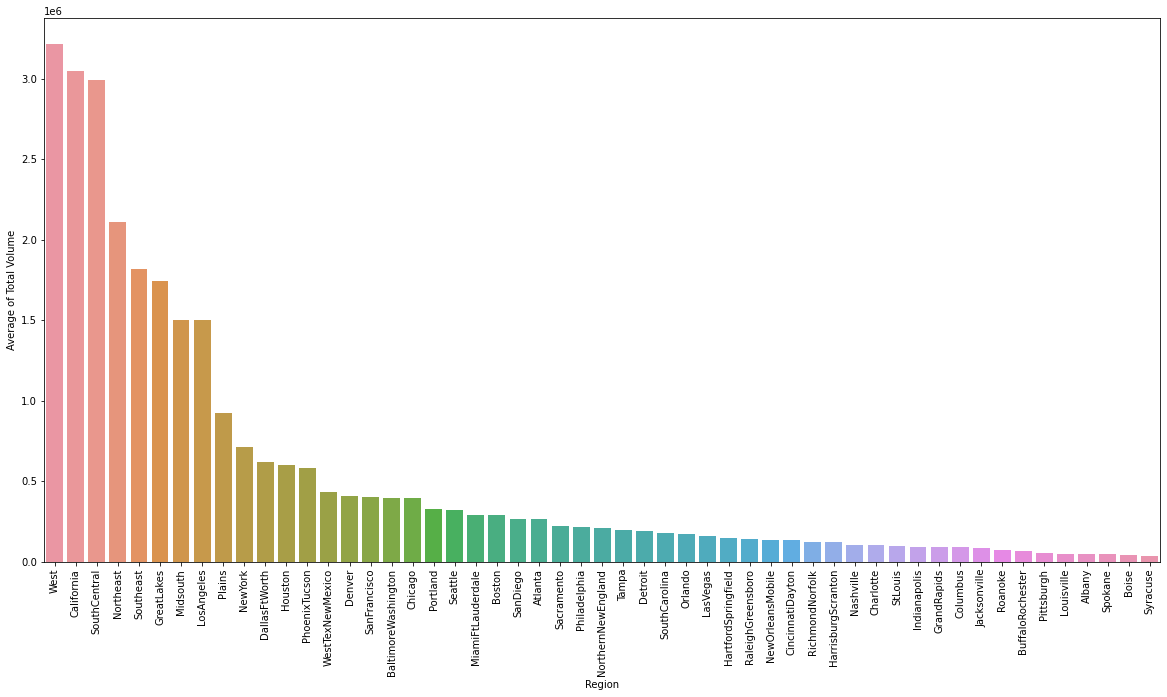

In [28]:
# TOP 5 regions where Average consumption is very high
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(20,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')

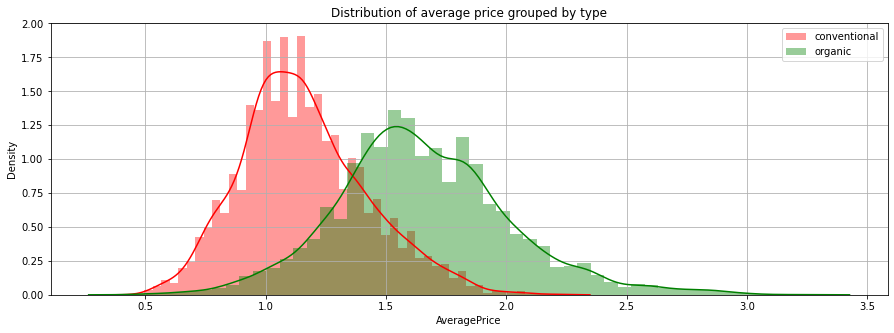

In [29]:
# Can we overlay the distribution of average price grouped by type?           
#set figure size
plt.figure(figsize=(15,5))

# Plot the distribution of conventional type data
sns.distplot(df["AveragePrice"][df['type'] == 'conventional'], color = 'r', label = 'conventional')
sns.distplot(df["AveragePrice"][df['type'] == 'organic'], color = 'g', label = 'organic')

# add legend, show the graphics
plt.legend()
plt.grid()
plt.title("Distribution of average price grouped by type")
plt.show()

- Organic Avacoados are more expensive than the conventional ones.

In [30]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000


<AxesSubplot:>

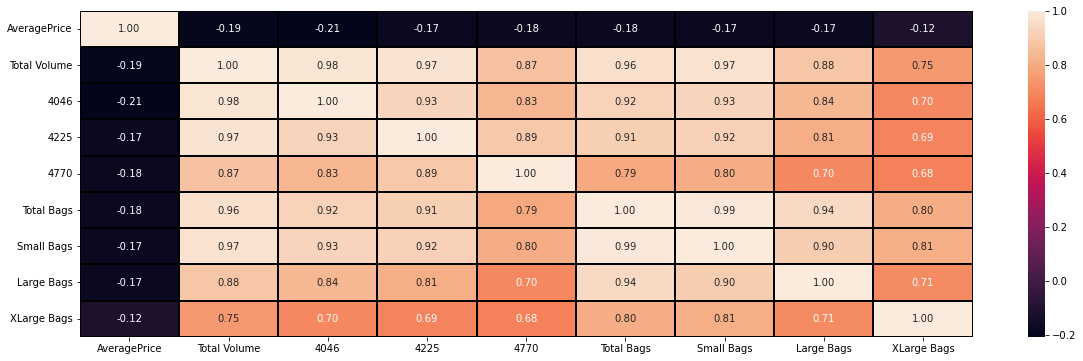

In [31]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

In [32]:
# Droping the Column
df.drop('Date',axis=1,inplace=True)

In [40]:
df['Time']=(df['Year']*365)+(df['month']*30)+(df['day'])
df.drop(['Year','month','day'],axis=1,inplace=True)

KeyError: 'Year'

In [41]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Time
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015201520152015201520152015201520152015201520...
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015201520152015201520152015201520152015201520...
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015201520152015201520152015201520152015201520...
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015201520152015201520152015201520152015201520...
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015201520152015201520152015201520152015201520...


In [45]:
df2 = df 
df3 = df

# Divide Data into Future & Label (Regression)

In [48]:
X = df2.drop(columns=['AveragePrice'])
y = df2['AveragePrice']

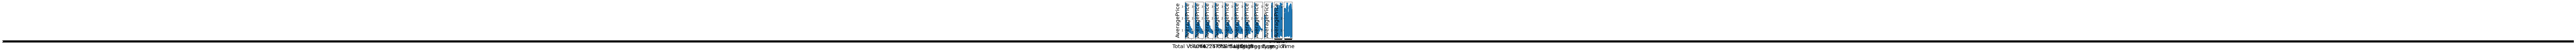

In [49]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=30: 
        ax=plt.subplot(10,30,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('AveragePrice', fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Removing Skewness & Outliers from the Data Set

In [ ]:
df2.skew().sort_values(ascending=False)

In [ ]:
from sklearn.preprocessing import power_transform
df2_new = power_transform(df2)
df2=pd.DataFrame(df2_new,columns=df2.columns)
df2.skew().sort_values(ascending=False)

In [ ]:
df2['AveragePrice'] = df['AveragePrice']

In [ ]:
df2.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()